# Atelier 1 « Régression »

## Partie 1 (Data Visualisation):

### 1 & 2. En utilisant pandas essayer d’explorer les données des deux Data sets. Afficher le résumer statistique des deux Data Sets avec une interprétation des résultatsobtenues.

In [82]:
import pandas as pd

df1 = pd.read_csv(r'C:\Users\imk\Desktop\LSI\Maching learning\data sets\Salary_Data.csv')
df3 = pd.read_csv(r'C:\Users\imk\Desktop\LSI\Maching learning\data sets\insurance.csv')


print("df1 : years & salary")
print(df1.head())
print(df1.info())
print(df1.shape)
print(df1.columns)

print("==================================================================================================")
print("df3 : age,sex,bmi,children,smoker,region,charges")
print(df3.head())
print(df3.info())
print(df3.shape)
print(df3.columns)


df1 : years & salary
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
(30, 2)
Index(['YearsExperience', 'Salary'], dtype='object')
df3 : age,sex,bmi,children,smoker,region,charges
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  nort

### interprétation des résultats obtenues.

## Partie 2 « Régression Simple cas Expérience Salaire »:

In [83]:
# import matplotlib.pyplot as plt

# # 2. Tracer le nuage de points
# plt.scatter(df1["YearsExperience"], df1["Salary"])

# # 3. Ajouter des titres pour comprendre le graphe
# plt.xlabel("Années d'expérience")
# plt.ylabel("Salaire")
# plt.title("Relation entre l'expérience et le salaire")

# # 4. Afficher le graphe
# plt.show()

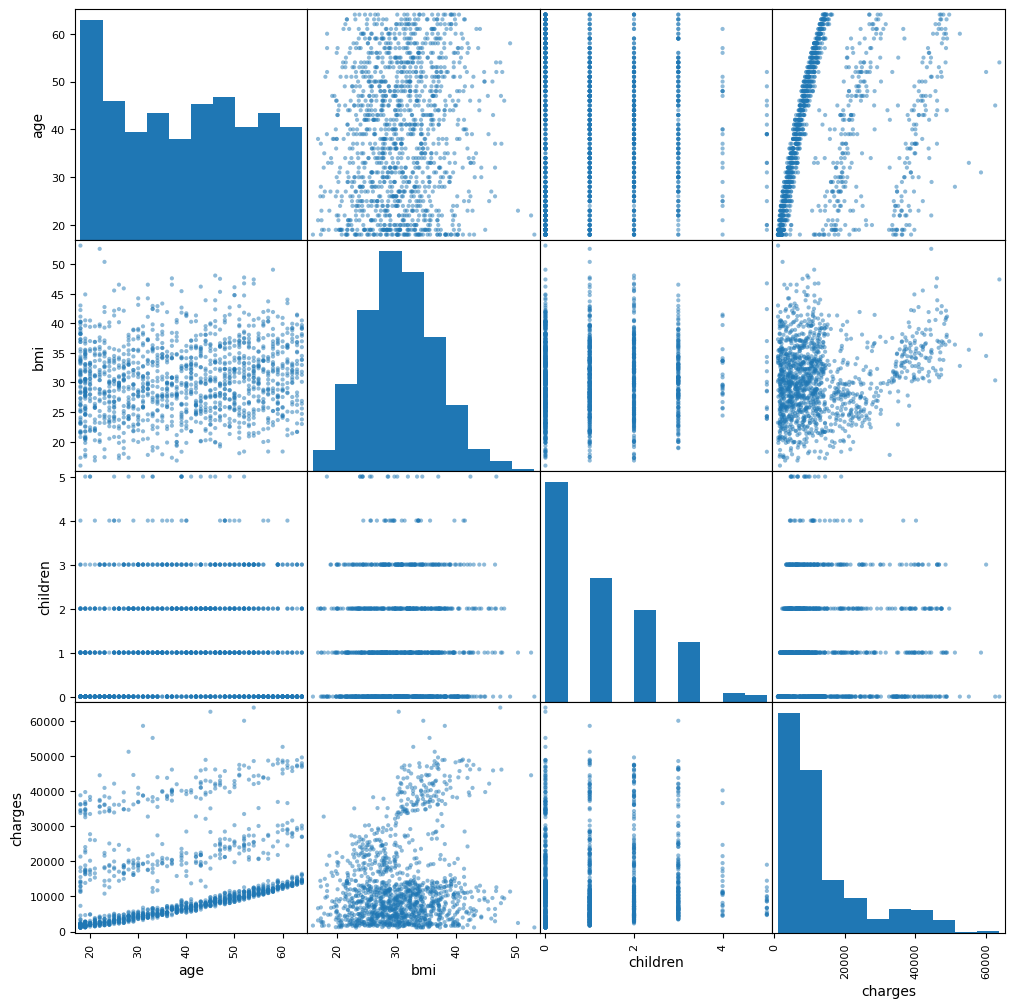

In [50]:
from pandas.plotting import scatter_matrix

# 2. Afficher la matrice de scatter plots
scatter_matrix(df3, figsize=(12, 12))

# 3. Montrer le résultat
plt.show()

## Partie 2 « Régression Simple cas Expérience Salaire »:

### 1. en utilisant l’API sklearn entraîner le modèle par intermédiaire de algorithme de la régression linière.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X1 = df1['YearsExperience'].values.reshape(-1, 1)
y1 = df1['Salary'].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1= LinearRegression()

model1.fit(X_train1, y_train1)

LinearRegression()

### 2. prédire les données d’un data set de test.

In [52]:
y_pred1 = model1.predict(X_test1)

### 3. Visualiser le résultat de la régression sous forme d’un graphe.

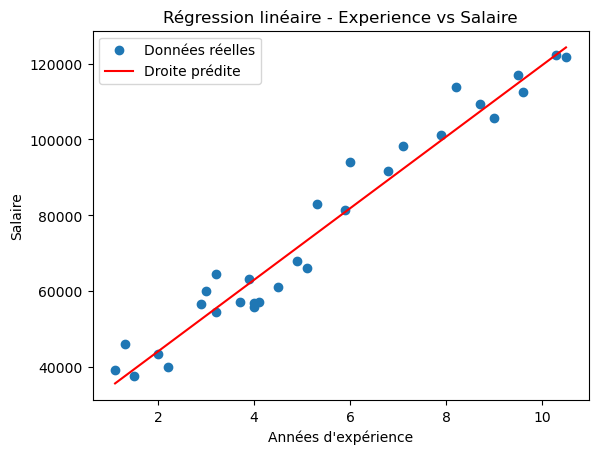

In [53]:


#Données réelles 
plt.scatter(X1, y1, label="Données réelles")

# Ligne de régression
plt.plot(X1, model.predict(X1), color="red", label="Droite prédite")

plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.title("Régression linéaire - Experience vs Salaire")
plt.legend()
plt.show()

### 4.   Évaluer le modèle en utilisant ces trois méthodes :

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = np.sqrt(mse)
mae1 = mean_absolute_error(y_test1, y_pred1)

print("MSE  :", mse1)
print("RMSE :", rmse1)
print("MAE  :", mae1)

MSE  : 49830096.85590839
RMSE : 5874.763304187489
MAE  : 6286.453830757749


### 5. interpretaion du reuslat des mae, mse, rmse 

1. MAE = 6286.45
👉 Interprétation :

Le modèle se trompe en moyenne de 6286 dh sur ses prédictions.

✔️ C'est acceptable, sachant que les salaires du dataset tournent autour de 35.000–120.000 dh.
❗ Ce n’est pas parfait, mais c’est normal avec un dataset très petit (30 lignes) → difficile pour un modèle d’apprendre précisément.

🔹 2. RMSE = 7059.04
👉 Interprétation :

L’erreur standard de prédiction est d’environ 7000 dh.

C’est un peu plus grand que le MAE car :

le RMSE pénalise beaucoup les grosses erreurs,

donc il indique qu'il y a quelques prédictions vraiment éloignées de la réalité.

🔹 3. MSE = 49,830,096
👉 Interprétation :

Nombre élevé, mais normal car :

MSE = erreur²
→ les erreurs de 6000–8000 deviennent des millions quand on les élève au carré.

Ce nombre seul n’est pas très interprétable, c'est pour ça qu’on regarde surtout le RMSE.

🎯 Conclusion globale
✔️ Ton modèle fonctionne correctement :

Il arrive à prédire les salaires avec une erreur autour de 6200–7000 dh.

✔️ Pourquoi l’erreur n’est pas plus petite ?

Parce que :

Le dataset est très petit (30 lignes)

La régression linéaire impose une ligne droite,

Le salaire ne dépend pas uniquement de l’expérience (niveau d’étude, entreprise, pays…)

Le dataset contient des outliers (valeurs anormales).

Donc obtenir un RMSE de ~7000 pour ce dataset est totalement normal.

📌 Comment juger la qualité du modèle ?

On compare l'erreur moyenne à l’ordre de grandeur du salaire.

Salaire moyen ≈ 65 000 dh

Erreur ≈ 6 000 – 7 000 dh

→ L’erreur représente 10% du salaire, ce qui est raisonnable pour un si petit dataset.

Donc ton modèle est correct.

##  partie 3 « Régression multiple cas d’assurance »: 

### 1. Appliquer les techniques EDA puis donner des conclusions sur les données.

In [76]:
print("\nRésumé statistique :")
print(df3.describe())

print("\nTypes des variables :")
print(df3.dtypes)

# Visualisation scatter_matrix pour l'EDA
# scatter_matrix(df3[['age','bmi','children','charges']], figsize=(10,8))
# plt.suptitle("Scatter Matrix - Insurance Dataset")
# plt.show()



Résumé statistique :
               age          bmi     children       smoker       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918     0.204783  13270.422265
std      14.049960     6.098187     1.205493     0.403694  12110.011237
min      18.000000    15.960000     0.000000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000     0.000000   4740.287150
50%      39.000000    30.400000     1.000000     0.000000   9382.033000
75%      51.000000    34.693750     2.000000     0.000000  16639.912515
max      64.000000    53.130000     5.000000     1.000000  63770.428010

Types des variables :
age           int64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object


### 2. Appliquer des techniques pour sélectionner 3 propriétés selon leurs dégrée d’importance justifier le choix.


#### Technique 1 — Matrice de corrélation (Heatmap)

charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


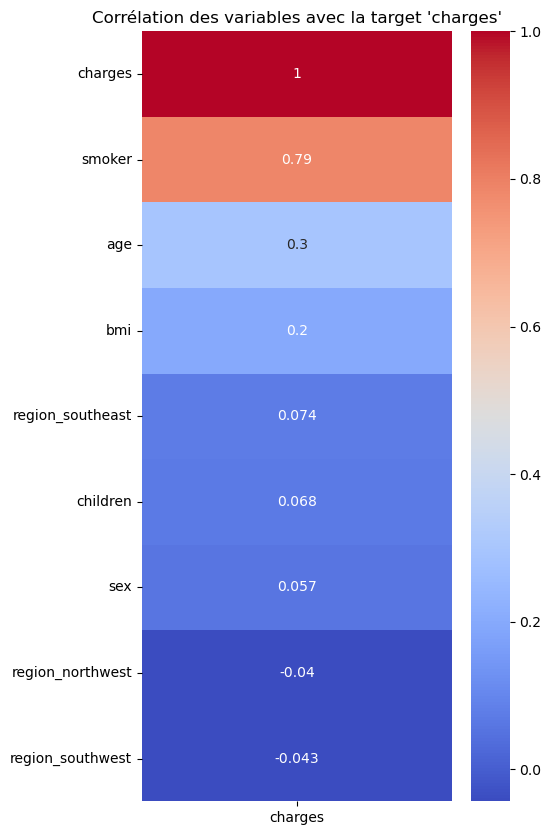

In [94]:
import seaborn as sns

df3_encoded = df3.copy()

df3_encoded['sex'] = df3_encoded['sex'].map({'male': 1, 'female': 0})
df3_encoded['smoker'] = df3_encoded['smoker'].map({'yes': 1, 'no': 0})

df3_encoded = pd.get_dummies(df3_encoded, columns=['region'], drop_first=True)

# Corrélations triées
corr_charges = df3_encoded.corr()['charges'].sort_values(ascending=False)

print(corr_charges)

# Heatmap de la colonne 'charges' uniquement
plt.figure(figsize=(5,10))
sns.heatmap(corr_charges.to_frame(),  # transforme en DataFrame
            annot=True,
            cmap="coolwarm")
plt.title("Corrélation des variables avec la target 'charges'")
plt.show()


In [56]:
# Encodage de la variable catégorielle "smoker"
df3['smoker'] = df3['smoker'].map({'yes':1, 'no':0})

# Définition des features (X) et de la target (y)
X3 = df3[['age', 'bmi', 'smoker']]
y3 = df3['charges']

# 5) Séparation train / test
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, y3, test_size=0.2, random_state=42
)

#### Technique 2 — Importance des features (RandomForestRegressor)

In [95]:
from sklearn.ensemble import RandomForestRegressor
# pas l'appel d'ajouter les region ils ont moins de imporatnce comme deja vue dans heatmap precidente 
df3_clean = df3.copy()
df3_clean['smoker'] = df3_clean['smoker'].map({'yes': 1, 'no': 0})
df3_clean['sex'] = df3_clean['sex'].map({'male': 1, 'female': 0})

model_rf = RandomForestRegressor()
model_rf.fit(df3_clean[['age','bmi','children','smoker']], df3_clean['charges'])

importances = model_rf.feature_importances_

for f, imp in zip(['age','bmi','children','smoker'], importances):
    print(f"{f} : {imp}")


age : 0.1306518539445538
bmi : 0.22901564444531902
children : 0.019730385791133922
smoker : 0.6206021158189933


#### Technique 3 — Interprétation logique

On peut justifier avec la logique du domaine de l’assurance.

 Les fumeurs ont un risque médical plus élevé → coût d’assurance plus élevé.

 BMI élevé = obésité = maladies cardiovasculaires → coût plus élevé.

 Age : plus une personne est âgée, plus le risque de maladie augmente.

  Donc les 3 features les plus pertinentes sont :  age, bmi, smoker

### 3. Appliquer des technique de standardisation ou bien de normalisation sur les  propriétés choisit, justifier le choix.


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# On ne standardise que age & bmi
X_train_scaled3 = X_train3.copy()
X_test_scaled3 = X_test3.copy()

X_train_scaled3[['age', 'bmi']] = scaler.fit_transform(X_train3[['age', 'bmi']])
X_test_scaled3[['age', 'bmi']] = scaler.transform(X_test3[['age', 'bmi']])

### 4. en utilisant l’API sklearn entraîner le modèle par intermédiaire de algorithme de la régression linière.


In [58]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X_train_scaled3, y_train3)

print("\nCoefficients du modèle :")
for feature, coef in zip(['age','bmi','smoker'], model3.coef_):
    print(f"{feature} : {coef}")

print("Intercept :", model3.intercept_)


Coefficients du modèle :
age : 3649.222439275517
bmi : 1971.9425409818928
smoker : 23675.37184665528
Intercept : 8478.256272566205


### 5. prédire les données d’un data set de test.


In [59]:
y_pred3 = model3.predict(X_test_scaled3)

### 6. Visualiser le résultat de la régression sous forme d’un graphe.


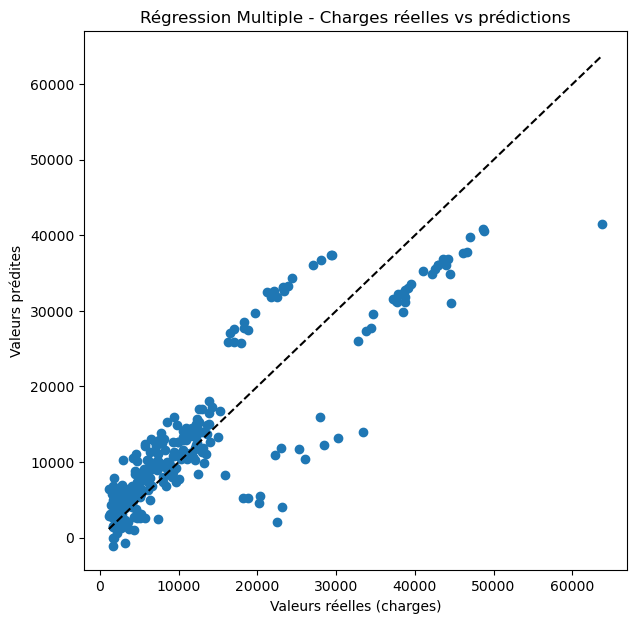

In [60]:
plt.figure(figsize=(7,7))
plt.scatter(y_test3, y_pred3)
plt.plot([y_test3.min(), y_test3.max()], [y_test3.min(), y_test3.max()], 'k--')
plt.xlabel("Valeurs réelles (charges)")
plt.ylabel("Valeurs prédites")
plt.title("Régression Multiple - Charges réelles vs prédictions")
plt.show()

###  7.   Évaluer le modèle en utilisant les trois méthodes :

In [61]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test3, y_pred3)

print("\nÉvaluation du modèle :")
print("MSE  :", mse)
print("RMSE :", rmse)
print("MAE  :", mae)


Évaluation du modèle :
MSE  : 34512843.8802279
RMSE : 5874.763304187489
MAE  : 4260.560091099393


## partie 4 « Régression linière polynomial multiple cas de china GDP»:

### 1. en utilisant l’API sklearn entraîner le modèle par intermédiaire de algorithme de la régression linière et puis la régression linière polynomiale .

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error


print("Aperçu du dataset :")
print(df2.head())

# 3) Séparation des variables X2 (Year) et y2 (Value)
X2 = df2[['Year']]
y2 = df2['Value']

# 4) Split train/test
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

# 5) Modèle 1 : Régression Linéaire simple
lin_model = LinearRegression()
lin_model.fit(X2_train, y2_train)

# model poly 
poly = PolynomialFeatures(degree=4)
X2_poly_train = poly.fit_transform(X2_train)  # transformation train
X2_poly_test = poly.transform(X2_test)        # transformation test

poly_model = LinearRegression()
poly_model.fit(X2_poly_train, y2_train)

Aperçu du dataset :
   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10


LinearRegression()

### 2. prédire les données d’un data set de test pour les deux modèles .

In [97]:
# Prédiction du modèle linéaire
y2_pred_lin = lin_model.predict(X2_test)



# Prédiction du modèle polynomial
y2_pred_poly = poly_model.predict(X2_poly_test)

### 3. Visualiser le résultat de la régression sous forme d’un graphe des deux modèles.

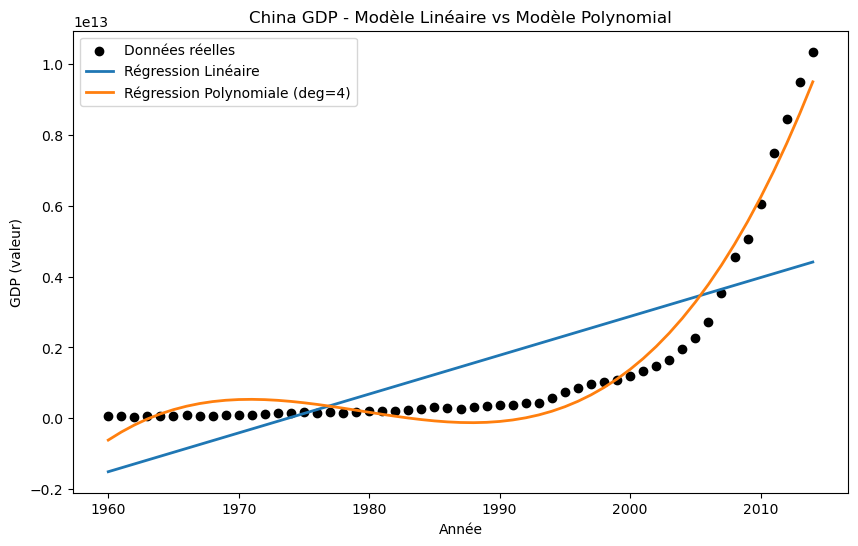

In [63]:
# 7) Visualisation des deux modèles
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

# Affichage des données réelles
plt.scatter(X2, y2, label="Données réelles", color='black')

# Courbe linéaire
X2_sorted = X2.sort_values(by='Year')
plt.plot(
    X2_sorted,
    lin_model.predict(X2_sorted),
    label="Régression Linéaire",
    linewidth=2
)

# Courbe polynomiale
plt.plot(
    X2_sorted,
    poly_model.predict(poly.transform(X2_sorted)),
    label="Régression Polynomiale (deg=4)",
    linewidth=2
)

plt.xlabel("Année")
plt.ylabel("GDP (valeur)")
plt.title("China GDP - Modèle Linéaire vs Modèle Polynomial")
plt.legend()
plt.show()

### 4. Évaluer les deux modèles en utilisant ces trois méthodes :

In [65]:
# Linéaire
mse_lin = mean_squared_error(y2_test, y2_pred_lin)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(y2_test, y2_pred_lin)

# Polynomial
mse_poly = mean_squared_error(y2_test, y2_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y2_test, y2_pred_poly)

print("\n--- Modèle Linéaire ---")
print("MSE  :", mse_lin)
print("RMSE :", rmse_lin)
print("MAE  :", mae_lin)

print("\n--- Modèle Polynomial (degré 4) ---")
print("MSE  :", mse_poly)
print("RMSE :", rmse_poly)
print("MAE  :", mae_poly)


--- Modèle Linéaire ---
MSE  : 2.9097229920495426e+24
RMSE : 1705791016522.699
MAE  : 1341446144991.7834

--- Modèle Polynomial (degré 4) ---
MSE  : 2.0753412966070593e+23
RMSE : 455559139586.40533
MAE  : 413445599274.1387


### interpretaion 

Interprétation des résultats
🔹 1. Modèle Linéaire — Résultats

MSE : 2.90 × 10²⁴

RMSE : 1.705 × 10¹²

MAE : 1.341 × 10¹²

🎯 Interprétation

Les erreurs sont énormes, ce qui indique que :

Le modèle linéaire ne parvient pas du tout à suivre la forme réelle des données GDP.

Le dataset China GDP suit une courbe logistique / sigmoïde, pas une droite.

Une régression linéaire tente de "forcer" une ligne droite là où il y a une courbe.

👉 Résultat : modèle très mauvais, erreurs gigantesques.

🔹 2. Modèle Polynomial (degré 4) — Résultats

MSE : 2.07 × 10²³

RMSE : 4.55 × 10¹¹

MAE : 4.13 × 10¹¹

🎯 Interprétation

Les erreurs sont encore très grandes, mais :

Elles sont ≈ 10 fois plus petites que le modèle linéaire.

Le modèle polynomial capture mieux la courbure réelle du GDP.

Le GDP suit une forme en S, et un polynôme de degré 4 arrive à mieux l'approximier.

👉 Résultat : modèle polynomial nettement meilleur mais pas parfait.

📌 Conclusion Générale
✔ Le modèle linéaire est très mauvais

Car il ne peut pas représenter une croissance économique de type logistique.

✔ Le modèle polynomial de degré 4 est meilleur

Mais les valeurs d’erreurs restent énormes (car les valeurs de GDP sont elles-mêmes très grandes : de l’ordre de 10¹²).

✔ Pourquoi les erreurs sont très grandes ?

Parce que :

Les valeurs de GDP dans ce dataset sont gigantesques → échelle en trillions / quadrillions.

Ces métriques (MSE, RMSE) augmentent au carré → valeurs explosent.

✔ Comment mieux évaluer ?

Souvent on utilise :

R² score

ou RMSE normalisé

Ça donne une idée plus réaliste de la performance.

📌 Interprétation qualitative sur le graphique

Si tu affiches le graphe :

La droite du modèle linéaire traverse totalement à côté des points.

Le modèle polynomial épouse beaucoup mieux la courbe, surtout au milieu.

C’est exactement ce qu’on attend pour un dataset qui suit une courbe logistique.

📌 Résumé final (très court)
Modèle	Erreur	Interprétation
Linéaire	Très grande	Modèle incapable. Forme réelle non-linéaire.
Polynomial (deg 4)	Grande mais beaucoup plus petite	Suit mieux la courbe. Modèle acceptable.